# [Lab Session 2](otsu.ipynb)

In [64]:
import numpy as np
import matplotlib.pyplot as plt

**[Task 1.1.]()** Load the image:

In [65]:
imgf = plt.imread("data/NIH3T3/im/dna-0.png")

**[Task 1.2.]()** Quantify the image into 256 bins:

In [66]:
img8 = (imgf * 255).round().astype(np.uint8)

**[Task 1.3.]()** Compute the image histogram:

In [67]:
h = []
for i in range(0,256):
    bool_img8 = img8 == i
    pixelcount = bool_img8.sum()
    h.append(pixelcount)

h = np.array(h)
    

Show the computed histogram:

<BarContainer object of 256 artists>

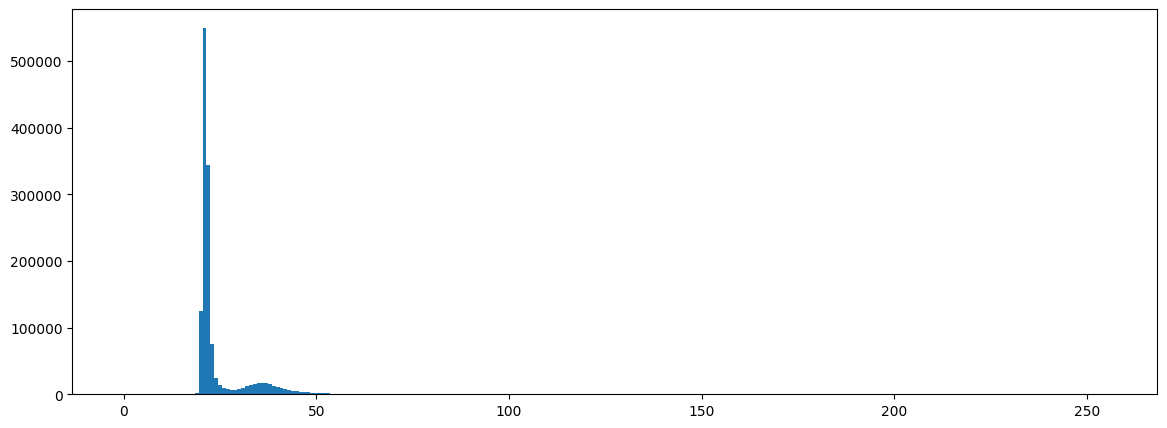

In [68]:
plt.figure(figsize=(14,5))
plt.bar(range(256), h, width=1)

**[Task 1.4.]()** Implement the method of Otsu:

In [69]:
sigma_b_squared_max = 0
threshold = 0
for T in range(1, 256):
    n1 = np.sum(h[0:T])
    n2 = np.sum(h[T:256])
    if n1 == 0 or n2 == 0:
        continue    
    mean1 = np.sum([i * h[i] for i in range(0, T)]) / n1 
    mean2 = np.sum([i * h[i] for i in range(T, 256)]) / n2
    sigma_b_squared = n1 * n2 * (mean1 - mean2) ** 2
 
    if sigma_b_squared > sigma_b_squared_max :
        sigma_b_squared_max = sigma_b_squared
        threshold = T 

print(threshold)



31


In [70]:
#Or for within classes variance minimization
#sigma_w_squared_min = 1000
#threshold = 0
#for T in range(1, 256):
 #   n1 = np.sum(h[0:T])
  #  n2 = np.sum(h[T:256])
   # if n1 == 0 or n2 == 0:
    #    continue    
    #var1 = np.sum([(i - mean1)**2 * h[i] for i in range(0, T)]) / n1
    #var2 = np.sum([(i - mean2)**2 * h[i] for i in range(T, 256)]) / n2
    #sigma_w_squared = (n1 * var1 + n2 * var2) / (n1 + n2)

    # Find minimum sigma_w_squared (minimize within-class variance)
    #if sigma_w_squared < sigma_w_squared_min:
     #   sigma_w_squared_min = sigma_w_squared
      #  threshold = T

#print(threshold)


**[Task 1.5.]()** Perform Otsu thresholding:

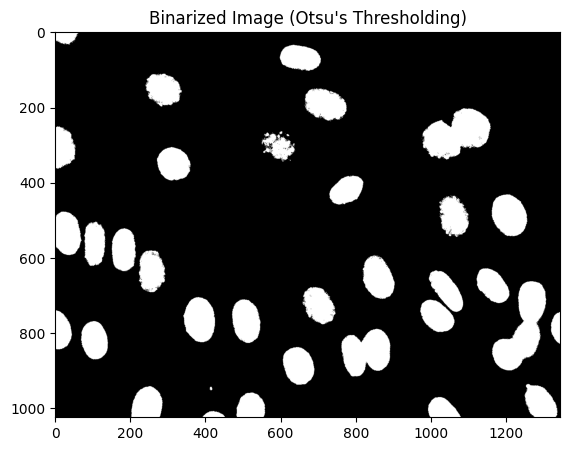

In [71]:
# Perform otsu thresholding
binary_img = img8 >= threshold  
plt.figure(figsize=(10,5))
plt.title("Binarized Image (Otsu's Thresholding)")
plt.imshow(binary_img, cmap='gray')

**[Task 1.6.]()** Compute the Dice coefficient:

In [72]:
# compute the dice coefficient
GT = plt.imread("data/NIH3T3/gt/0.png").astype(bool)

dice_score = 2 * np.sum(binary_img * GT) / (np.sum(binary_img) + np.sum(GT))
print("Dice score:", dice_score)

Dice score: 0.8943783223933183
